<a href="https://colab.research.google.com/github/amaljithpapi/Unsupervised-Learning/blob/main/daily_task_unsupervised_learning(fish_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [59]:
# Load the dataset
fish_data = pd.read_csv('/content/fish.csv')

In [60]:
# Assign appropriate column names
fish_data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# Extract the features 'Weight' and 'Length1'
features = fish_data[['Weight', 'Length1']]

In [61]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [62]:
# Elbow method to find the optimal number of clusters for KMeans
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

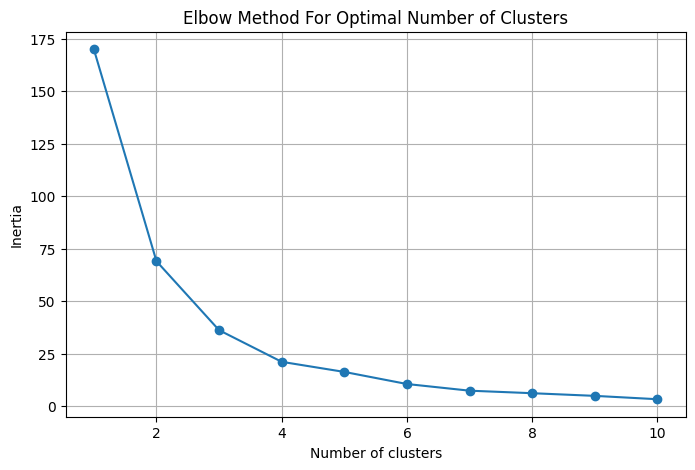

In [63]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


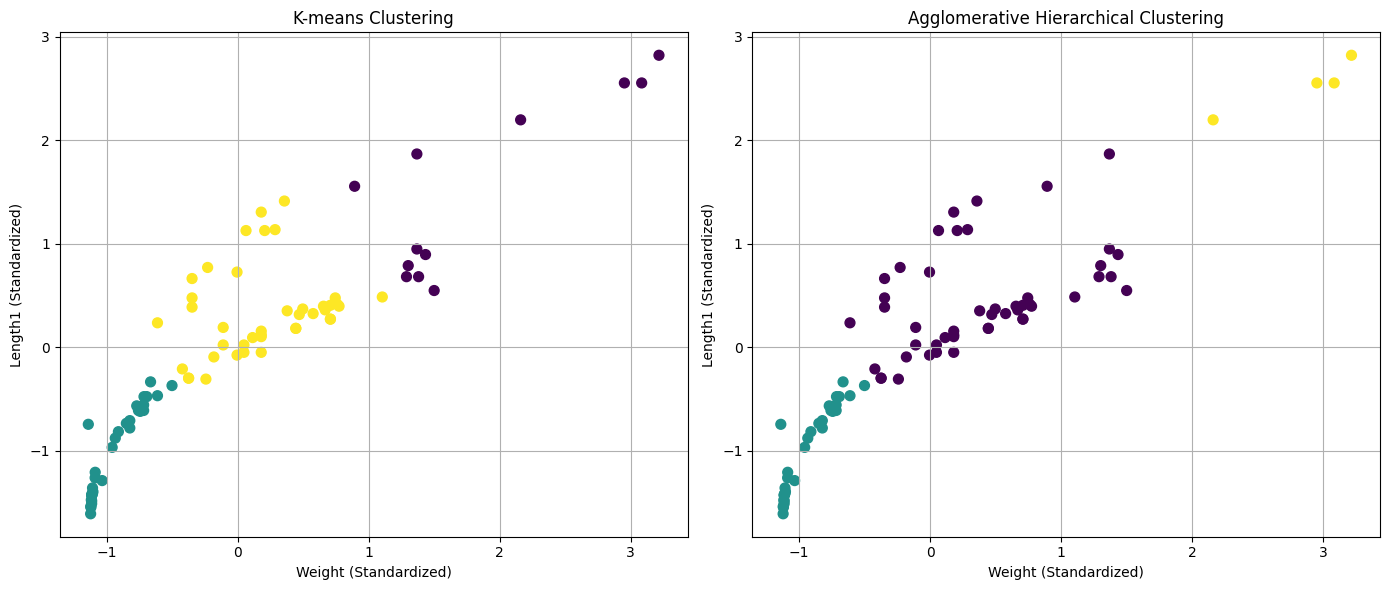

In [64]:
# Assuming the optimal number of clusters is 3 based on the elbow plot
optimal_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(scaled_features)

# Plot the clustering results
plt.figure(figsize=(14, 6))

# K-means Clustering
plt.subplot(1, 2, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Length1 (Standardized)')
plt.grid(True)

# Agglomerative Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=agg_labels, cmap='viridis', marker='o', s=50)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Length1 (Standardized)')
plt.grid(True)

plt.tight_layout()
plt.show()
